## Modules and helper functions

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
import pandas as pd

def plot_decision_boundaries(X, y, model):

    # adapted from https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolor="k")
    plt.show()

def plot3D(X, y, mod=None):
    # code adapted from https://stackoverflow.com/questions/51278752/visualize-2d-3d-decision-surface-in-svm-scikit-learn

    z = lambda x,y: (-mod.intercept_[0]-mod.coef_[0][0]*x -mod.coef_[0][1]*y) / mod.coef_[0][2]

    tmp = np.linspace(-1,1,30)
    xx,yy = np.meshgrid(tmp,tmp)

    fig = plt.figure(figsize=(8, 8))
    ax  = fig.add_subplot(111, projection='3d')
    ax.plot3D(X['x1'][y==0], X['x2'][y==0], X['sq'][y==0],'o', c='purple')
    ax.plot3D(X['x1'][y==1], X['x2'][y==1], X['sq'][y==1],'oy')
    if mod:
        ax.plot_surface(xx, yy, z(xx,yy), alpha=0.5)
    ax.view_init(30, 60)
    plt.show()

np.random.seed(0) # ensure consistent results


## Support Vector Machines


**SVMs** find a separating line (or, more generally, a hyperplane) between two classes.

First, however, we'll look at some data that cannot be separated by a line. We'll perform feature engineering to prepare it for SVM.

We'll start with a synthetic dataset with concentric circles, stored in a pandas DataFrame, with the two features called x1 and x2.

           x1        x2
0    0.320554  0.001590
1   -0.017777 -0.224308
2   -0.805155 -0.662227
3    0.159291  0.189158
4   -0.193429  0.241444
..        ...       ...
995 -0.126556 -0.151548
996 -0.766648  0.677558
997 -0.001987  0.197007
998  0.250626  0.183915
999 -0.231000  0.192086

[1000 rows x 2 columns]


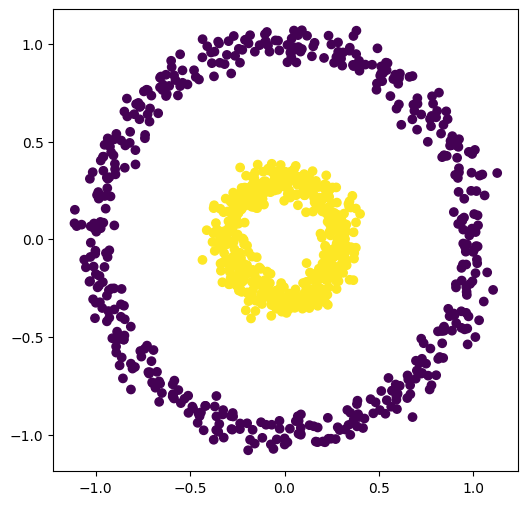

In [ ]:
from sklearn.datasets import make_circles
import pandas as pd
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05)
X = pd.DataFrame(X)
X.columns = ['x1', 'x2']
print(X)
plt.figure(figsize=(6, 6))
plt.scatter(X['x1'], X['x2'], c=y)
plt.show()

Since we know that distance from the center is important here, we can "engineer" a new feature based on this value that will help us separate the classes. This can be thought of as projecting it into higher dimensions where the data are separable.

**1. Add a new feature (column) to X called 'sq' that is the sum of the squares of the first two features ('x1' and 'x2').**
- Hint: remember that X is now a pandas DataFrame

In [ ]:
# YOUR CODE HERE (1)

sq_list = []

for i in range(len(X)):
    sq_list.append(X['x1'][i]**2 + X['x2'][i]**2)

X['sq'] = sq_list

In [ ]:
print(X)

           x1        x2        sq
0    0.320554  0.001590  0.102758
1   -0.017777 -0.224308  0.050630
2   -0.805155 -0.662227  1.086820
3    0.159291  0.189158  0.061154
4   -0.193429  0.241444  0.095710
..        ...       ...       ...
995 -0.126556 -0.151548  0.038983
996 -0.766648  0.677558  1.046833
997 -0.001987  0.197007  0.038816
998  0.250626  0.183915  0.096638
999 -0.231000  0.192086  0.090258

[1000 rows x 3 columns]


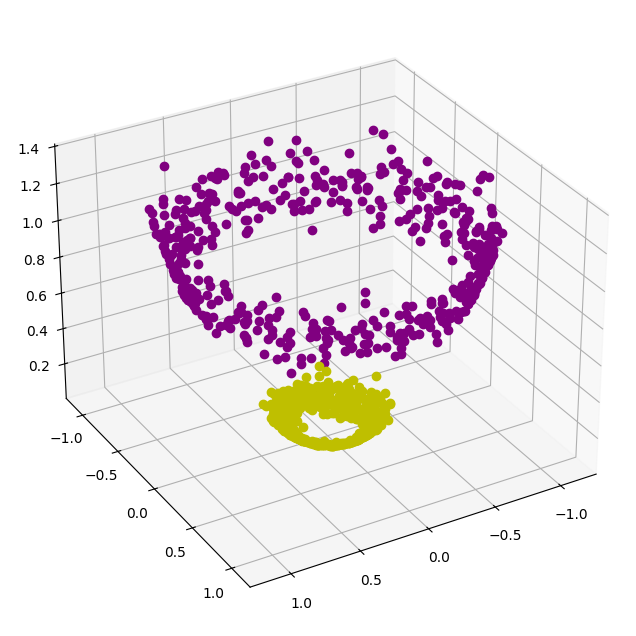

In [ ]:
plot3D(X, y)

The data now form a parabaloid (bowl shape) that can be separated by a plane. Note that this new feature is actually the square of the distance of the points from the center. This is often called the "norm squared" (in this case L2-norm). Taking the square root to get the true distance is not necessary for our purposes because the square root is a monotonic (constantly increasing) function. In other words, if you were to divide the plot above into a stack of thin, horizontal slices, these slices would be scaled upward or downward by the square root but would not change order, and thus would not change wether any points lie above or below any particular slice.

**2. Create an [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classifier) model with a linear kernel named `mod` and fit it to X and y.**
- Note: we do not need to split into train and test data, since we are only fitting synthetic data for illustration purposes
- Hint: See the parameter `kernel`

In [ ]:
# YOUR CODE HERE (2)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

mod = SVC(kernel='linear')
mod.fit(X, y)

SVC(kernel='linear')

Let's look at the decision boundary.

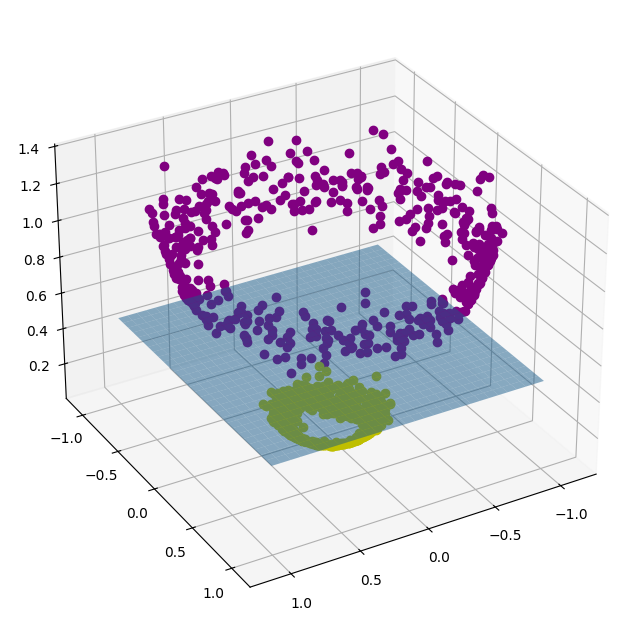

In [ ]:
plot3D(X, y, mod)

The separating plane is exactly where we would expect. By engineering features we were able to use standard SVM. But what if the relationship is not as obvious? Kernels can help. Using a polynomial kernel of degree 2 will have the effect of adding such features for all quadratic combinations of the original features, but without actually computing the new features.

Let's drop the 'sq' column from X and let the kernel do the work.

In [ ]:
X=X.drop(['sq'], axis=1)
X=X.to_numpy()

**3. Make `mod` an SVC model with a polynomial kernel of degree 2. Fit it to X and y again.**
- Hint: see the parameter `degree`

In [ ]:
# YOUR CODE HERE (3)
mod = SVC(degree=2, kernel='poly')
mod.fit(X, y)

SVC(degree=2, kernel='poly')

Let's look at the decision boundary on the 2D data.

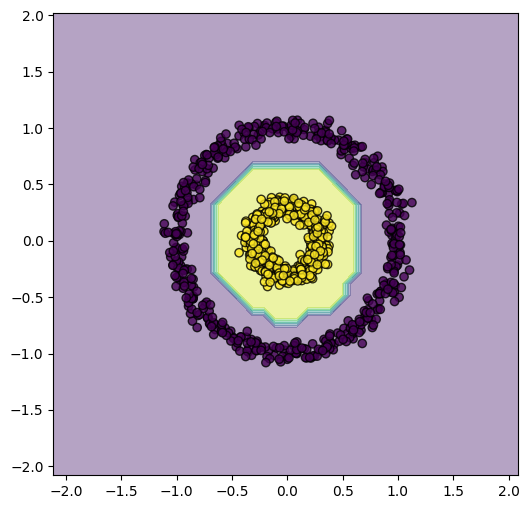

In [ ]:
plot_decision_boundaries(X, y, mod)

Since the kernel had the effect of projecting our data into higher dimensions for us, the boundary can now be non-linear in the original 2-dimensional space.

But what degree of polynomial do we need? Instead of deciding, we'll look at the **Radial Basis Function (RBF)** kernel, also called a gaussian kernel. This generalizes the idea of adding features up to infinite dimensions (remember they are not actually computed). Since the RBF is based on the distance of training points to each other, this is also makes the resulting boundary similar to K-Nearest Neighbors.

The `gamma` hyperparameter controls how much training points influence each other as they get further apart.

We'll go back to our breast cancer dataset.  We'll get two features, scale and split into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

(data, labels) = load_breast_cancer(return_X_y=True, as_frame=True)
var1 = 'mean radius'
var2 = 'mean compactness'
X = data[[var1, var2]].to_numpy()
y = labels
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

**4. Make an SVC model named `mod` with an RBF kernel and `gamma` of 20, and fit it to `X_train` and `y_train`.**

In [ ]:
# YOUR CODE HERE (4)
mod = SVC(kernel='rbf', gamma=20)
mod.fit(X_train, y_train)

SVC(gamma=20)

Let's see the decision boundary and evaluate.

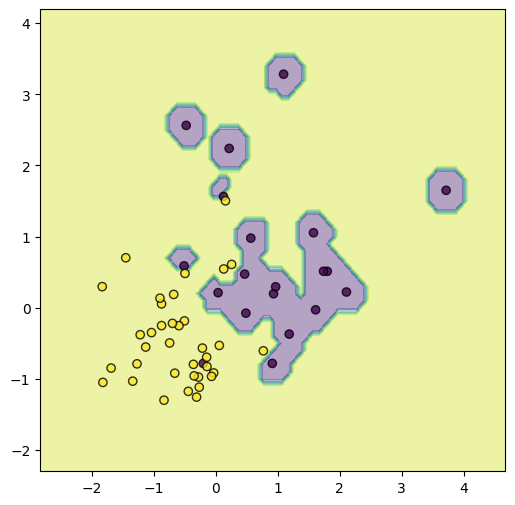

Training acc: 0.964286
Testing acc:  0.742690


In [ ]:
from sklearn.metrics import accuracy_score
plot_decision_boundaries(X_train, y_train, mod)
print("Training acc: %f"%accuracy_score(y_train, mod.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, mod.predict(X_test)))

We've overfit. This is a lot like the KNN case where we only considered a single neighbor, and the boundary was too tight around individual points.

**5. Make gamma 1 and fit the model again.**

In [ ]:
# YOUR CODE HERE (5)
mod = SVC(kernel='rbf', gamma=1)
mod.fit(X_train, y_train)

SVC(gamma=1)

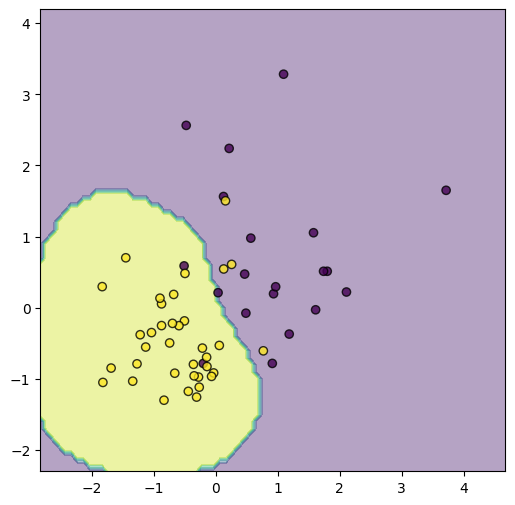

Training acc: 0.892857
Testing acc:  0.902534


In [ ]:
from sklearn.metrics import accuracy_score
plot_decision_boundaries(X_train, y_train, mod)
print("Training acc: %f"%accuracy_score(y_train, mod.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, mod.predict(X_test)))

This looks more reasonable, and our train and test accuracies are much closer. Note that if we do not provide gamma, Scikit-learn will use a formula to set it to a value that usually works well.

## Decision trees

Decision trees iteratively split data using simple rules. The classifiers they create can be easily interpreted. However, they also suffer from overfit. This can be dealt with by pruning or by using Random Forests, which use ensembling and subsetting. A drawback of Random Forests is that they are no longer interpretable.

**6. Fit a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) model named `mod` to `X_train` and `y_train`. Remember to import the module!**

In [ ]:
# YOUR CODE HERE (6)
from sklearn.tree import DecisionTreeClassifier
mod = DecisionTreeClassifier()
mod.fit(X_train, y_train)

DecisionTreeClassifier()

Now let's see the decision boundary and accuracies.

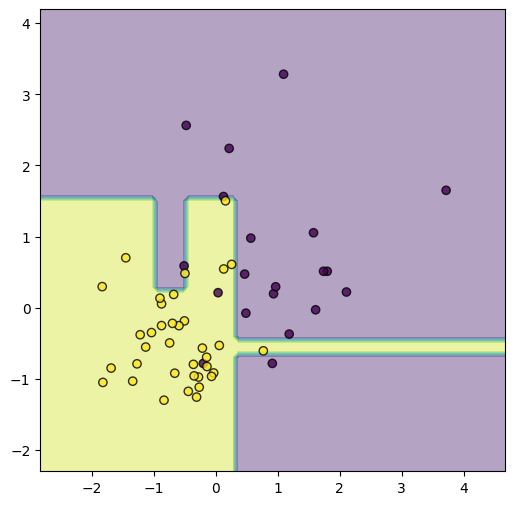

Training acc: 1.000000
Testing acc:  0.853801


In [ ]:
plot_decision_boundaries(X_train, y_train, mod)
print("Training acc: %f"%accuracy_score(y_train, mod.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, mod.predict(X_test)))

Looks like we've overfit again. In the plot we can see that splits have been made around every point to make sure it is classified correctly.

**7. Fit again, with a maximum depth of 3.**
- Hint: see the `max_depth` parameter

In [ ]:
# YOUR CODE HERE (7)
mod = DecisionTreeClassifier(max_depth=3)
mod.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

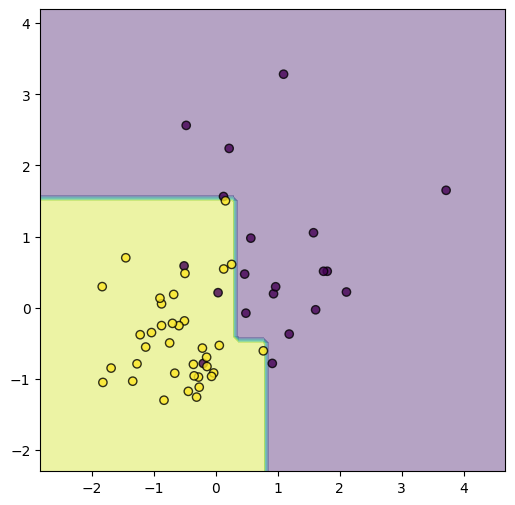

Training acc: 0.946429
Testing acc:  0.881092


In [ ]:
plot_decision_boundaries(X_train, y_train, mod)
print("Training acc: %f"%accuracy_score(y_train, mod.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, mod.predict(X_test)))

This looks better. Let's see what the actual rules are by plotting the tree.

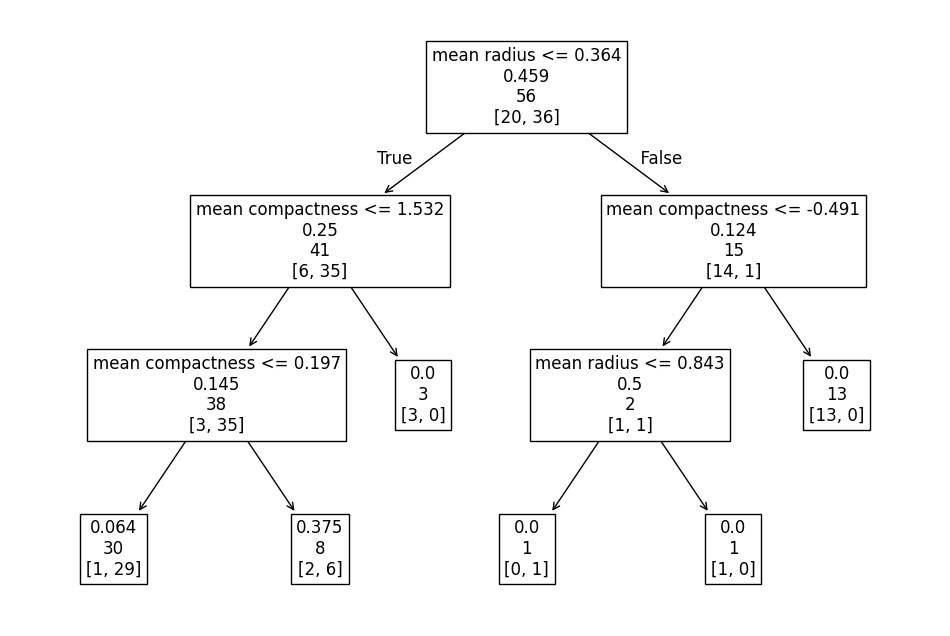

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(mod, feature_names=[var1, var2], label='none', fontsize=12)
plt.show()

Now let's try Random Forests.

**8. Create a [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) named `mod`, with a maximum depth of 3, and fit it  to `X_train` and `y_train`. Remember to import the module!**

In [ ]:
# YOUR CODE HERE (8)
from sklearn.ensemble import RandomForestClassifier
mod = RandomForestClassifier(max_depth=3)
mod.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

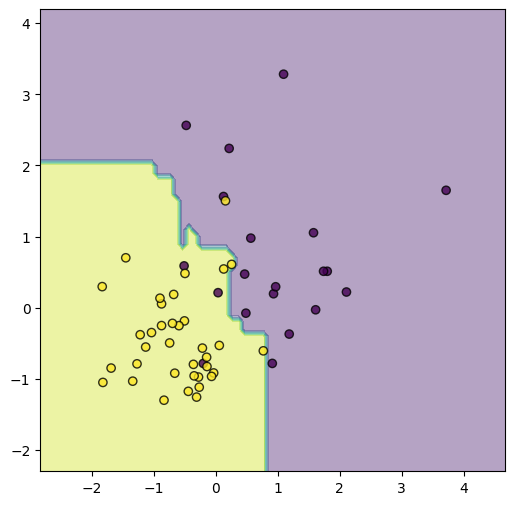

Training acc: 0.928571
Testing acc:  0.894737


In [ ]:
plot_decision_boundaries(X_train, y_train, mod)
print("Training acc: %f"%accuracy_score(y_train, mod.predict(X_train)))
print("Testing acc:  %f"%accuracy_score(y_test, mod.predict(X_test)))

The ensemble version does even better.